In [ ]:
pip install pandas numpy tensorflow scikit-learn


In [ ]:
pip install chardet

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load your dataset
# Assuming your dataset is a CSV file
data = pd.read_csv('rainfall_raw.csv', encoding='ISO-8859-1')

In [ ]:
print(data.head())

   Station Code                    Station Name      District   Latitude  \
0  CHEMBARMPAKM  Chembarambakkam                 Kancheepuram  13°00'30"   
1  CHEMBARMPAKM  Chembarambakkam                 Kancheepuram  13°00'30"   
2  CHEMBARMPAKM  Chembarambakkam                 Kancheepuram  13°00'30"   
3  CHEMBARMPAKM  Chembarambakkam                 Kancheepuram  13°00'30"   
4  CHEMBARMPAKM  Chembarambakkam                 Kancheepuram  13°00'30"   

   Longitude  Year  Month  Day  RF in mm        Date  
0  80°05'05"  2019      1    1       0.0  2019-01-01  
1  80°05'05"  2019      1    2       0.0  2019-01-02  
2  80°05'05"  2019      1    3       0.0  2019-01-03  
3  80°05'05"  2019      1    4       0.0  2019-01-04  
4  80°05'05"  2019      1    5       0.0  2019-01-05  


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Function to convert DMS to decimal degrees
def dms_to_decimal(dms):
    match = re.match(r"(\d+)°(\d+)'(\d+)\"", dms)
    if match:
        degrees = float(match.group(1))
        minutes = float(match.group(2))
        seconds = float(match.group(3))
        decimal = degrees + minutes / 60 + seconds / 3600
        return decimal
    else:
        raise ValueError("Invalid DMS format")

In [ ]:
# Convert latitude and longitude
data['Latitude'] = data['Latitude'].apply(dms_to_decimal)
data['Longitude'] = data['Longitude'].apply(dms_to_decimal)

# Extract features and target
data['day_of_year'] = data['Date'].dt.dayofyear
features = data[['Latitude', 'Longitude', 'day_of_year']].values
target = data['RF in mm'].values

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Reshape features for CNN: (samples, height, width, channels)
features_reshaped = features_scaled.reshape(features_scaled.shape[0], 1, 3, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, target, test_size=0.2, random_state=42)

In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 2), activation='relu', input_shape=(1, 3, 1)))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 103.1723 - val_loss: 111.8609
Epoch 2/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 102.9824 - val_loss: 111.5877
Epoch 3/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 104.3036 - val_loss: 111.4246
Epoch 4/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 99.4306 - val_loss: 111.4411
Epoch 5/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 98.0528 - val_loss: 111.6981
Epoch 6/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 99.1238 - val_loss: 111.3391
Epoch 7/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 103.0143 - val_loss: 111.1838
Epoch 8/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 101.9938 - val_loss: 111.1448
Epoch 9/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 100.9032 - val_loss: 111.3988
Epoch 10/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 98.1737 - val_loss: 111.2146
Epoch 11/100
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 102.

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 108.1579
Test Loss: 107.91536712646484


In [ ]:
# Make predictions
predictions = model.predict(X_test)

781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


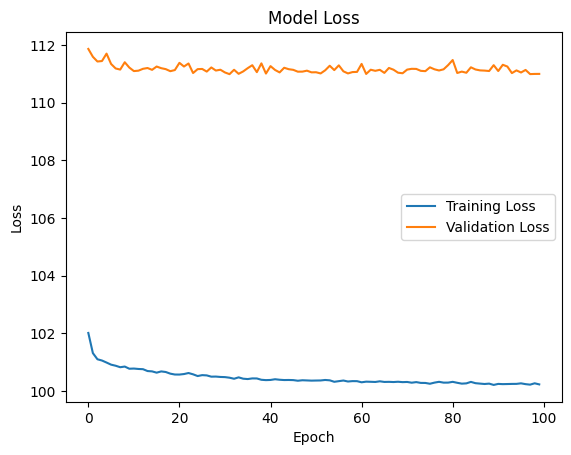

In [ ]:
# Visualize the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

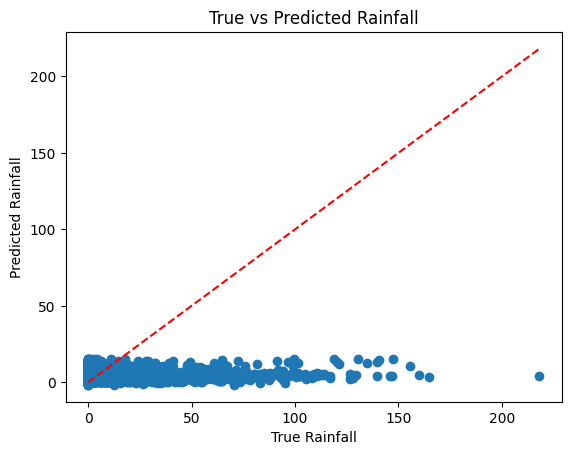

In [ ]:
# Compare predictions to actual values
plt.scatter(y_test, predictions)
plt.xlabel('True Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('True vs Predicted Rainfall')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Reference line
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
loss = model.evaluate(X_train, y_train)
print(f'Test Loss (MSE): {loss}')

# Make predictions
predictions = model.predict(X_train)

# Calculate evaluation metrics
mae = mean_absolute_error(y_train, predictions)
mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, predictions)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

3122/3122 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 97.5052
Test Loss (MSE): 102.23854064941406
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Mean Absolute Error (MAE): 4.353281983784416
Mean Squared Error (MSE): 102.23856296867447
Root Mean Squared Error (RMSE): 10.111308667461126
R-squared (R²): 0.045050293385929696


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


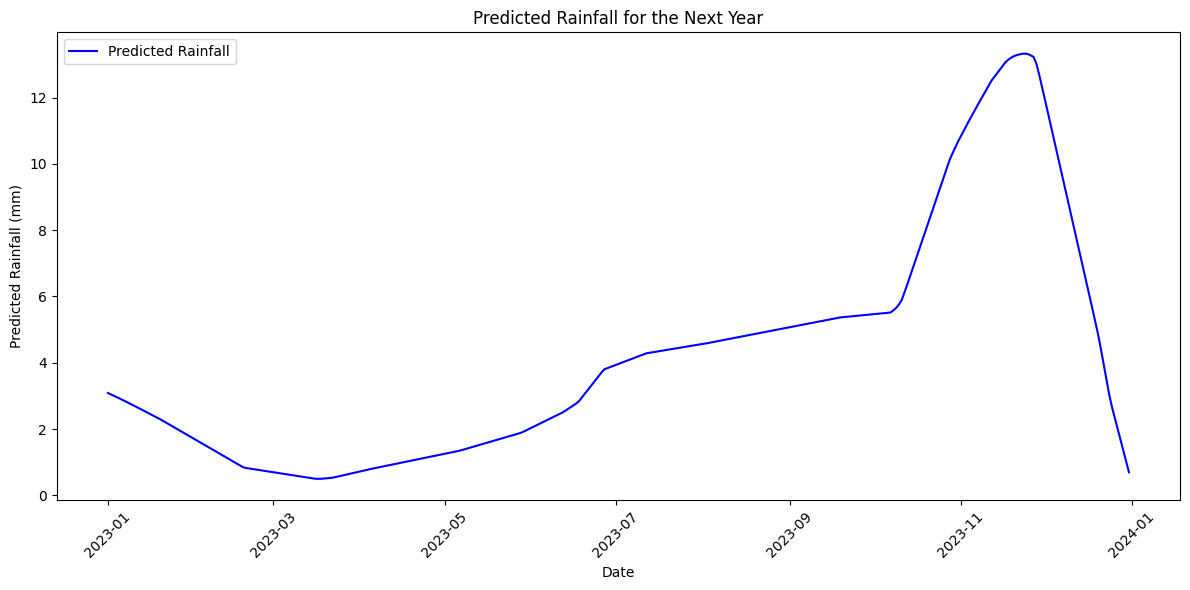

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Generate future dates for the next year
start_date = data['Date'].max() + timedelta(days=1)
future_dates = pd.date_range(start=start_date, periods=365)

# Assuming you want to use the same latitude and longitude as your dataset
latitude = data['Latitude'].iloc[0]  # Use the first latitude
longitude = data['Longitude'].iloc[0]  # Use the first longitude

# Create a DataFrame for future predictions
future_data = pd.DataFrame({
    'Date': future_dates,
    'Latitude': [latitude] * 365,
    'Longitude': [longitude] * 365
})

# Extract day of the year for future dates
future_data['day_of_year'] = future_data['Date'].dt.dayofyear

# Prepare features for the model
future_features = future_data[['Latitude', 'Longitude', 'day_of_year']].values

# Normalize the features using the same scaler as before
future_features_scaled = scaler.transform(future_features)

# Reshape for the CNN
future_features_reshaped = future_features_scaled.reshape(future_features_scaled.shape[0], 1, 3, 1)

# Make predictions for the next year
predicted_rainfall = model.predict(future_features_reshaped)

# Add predictions to the DataFrame
future_data['predicted_rainfall'] = predicted_rainfall

# Plotting the predicted rainfall
plt.figure(figsize=(12, 6))
plt.plot(future_data['Date'], future_data['predicted_rainfall'], label='Predicted Rainfall', color='blue')
plt.title('Predicted Rainfall for the Next Year')
plt.xlabel('Date')
plt.ylabel('Predicted Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Enhancement-1**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 1.1651 - val_loss: 0.2099
Epoch 2/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.2367 - val_loss: 0.1951
Epoch 3/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.2229 - val_loss: 0.2048
Epoch 4/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.2227 - val_loss: 0.1972
Epoch 5/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.2204 - val_loss: 0.1871
Epoch 6/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.2137 - val_loss: 0.1929
Epoch 7/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.2151 - val_loss: 0.1884
Epoch 8/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.2046 - val_loss: 0.1850
Epoch 9/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.2164 - val_loss: 0.1833
Epoch 10/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.2104 - val_loss: 0.1952
Epoch 11/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.2086 - val_loss: 0.1828
Epoch 12

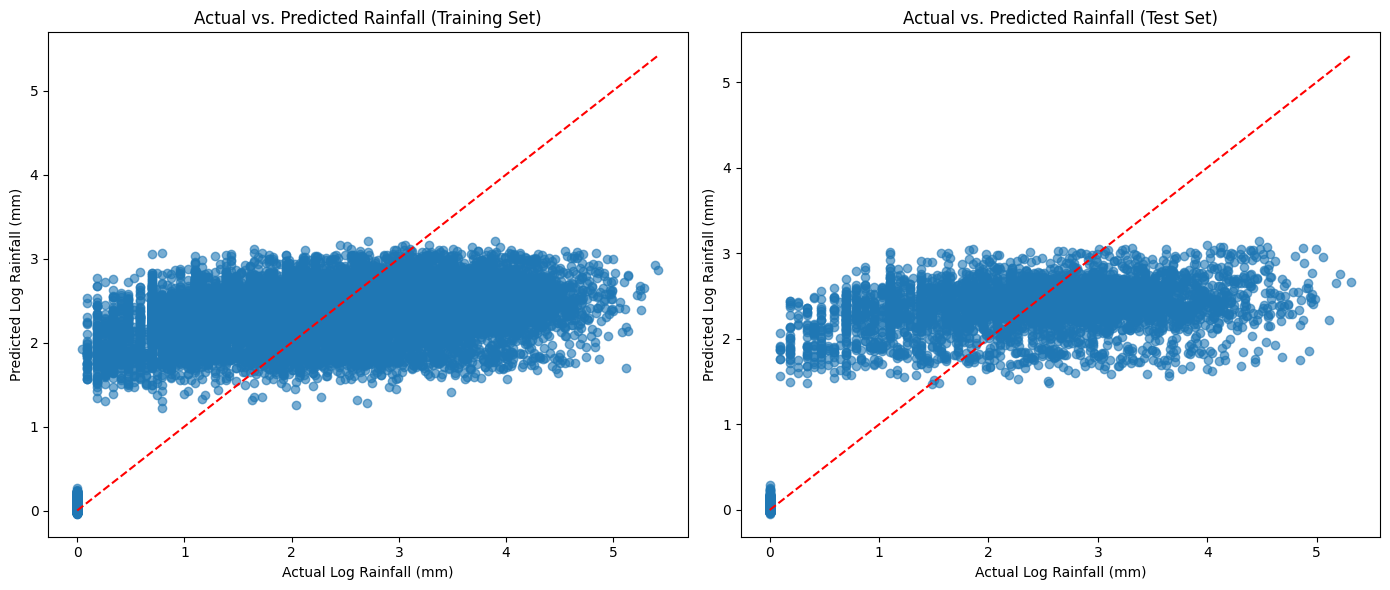

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('rainfall_raw.csv', encoding='ISO-8859-1')
data['Date'] = pd.to_datetime(data['Date'])

# DMS to Decimal conversion function
def dms_to_decimal(dms):
    match = re.match(r"(\d+)°(\d+)'(\d+)\"", dms)
    if match:
        degrees = float(match.group(1))
        minutes = float(match.group(2))
        seconds = float(match.group(3))
        decimal = degrees + minutes / 60 + seconds / 3600
        return decimal
    else:
        raise ValueError("Invalid DMS format")

# Convert latitude and longitude
data['Latitude'] = data['Latitude'].apply(dms_to_decimal)
data['Longitude'] = data['Longitude'].apply(dms_to_decimal)

# Create a rainy day indicator
data['rainy_day'] = (data['RF in mm'] > 0).astype(int)

# Log transformation (add a small constant to avoid log(0))
data['log_rainfall'] = np.log1p(data['RF in mm'])  # log(1 + rainfall)

# Create lag features for the past 7 days (using log_rainfall)
for lag in range(1, 8):
    data[f'lag_{lag}'] = data['log_rainfall'].shift(lag)

data.dropna(inplace=True)  # Drop rows with NaN values due to lag

# Feature Engineering
data['day_of_year'] = data['Date'].dt.dayofyear
features = data[['Latitude', 'Longitude', 'day_of_year', 'rainy_day'] + [f'lag_{lag}' for lag in range(1, 8)]].values
target = data['log_rainfall'].values  # Use log_rainfall as target

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reshape features for CNN: (samples, height, width, channels)
features_reshaped = features_scaled.reshape(features_scaled.shape[0], 1, features_scaled.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, target, test_size=0.2, random_state=42)

# Build the updated CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (1, 2), activation='relu', input_shape=(1, features_scaled.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Conv2D(32, (1, 2), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))  # Regularization
model.add(layers.Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)
print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')

# Plot Actual vs. Predicted for Training Set
plt.figure(figsize=(14, 6))

# Training Set Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Rainfall (Training Set)')
plt.xlabel('Actual Log Rainfall (mm)')
plt.ylabel('Predicted Log Rainfall (mm)')

# Test Set Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Rainfall (Test Set)')
plt.xlabel('Actual Log Rainfall (mm)')
plt.ylabel('Predicted Log Rainfall (mm)')

plt.tight_layout()
plt.show()

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
           Date  predicted_rainfall
0    2023-01-01           -0.018754
1    2023-01-02           -0.018422
2    2023-01-03           -0.018091
3    2023-01-04           -0.017759
4    2023-01-05           -0.017427
...         ...                 ...
3645 2032-12-24            6.613249
3646 2032-12-25            6.643544
3647 2032-12-26            6.673958
3648 2032-12-27            6.704493
3649 2032-12-28            6.735150

[3650 rows x 2 columns]


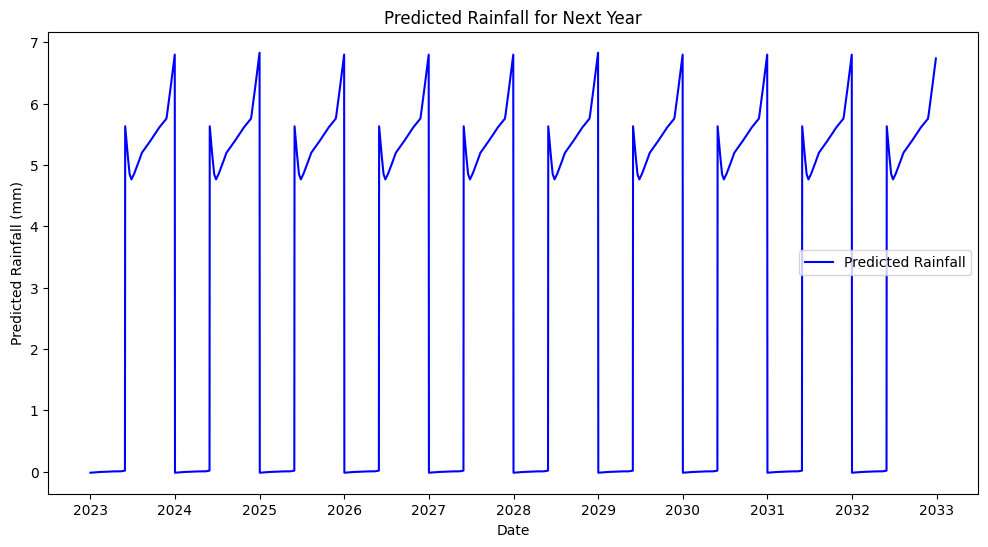

In [ ]:
# Function to predict rainfall for the next year
def predict_future_rainfall(model, last_data, num_days=365):
    last_date = last_data['Date'].max()
    future_dates = [last_date + timedelta(days=i) for i in range(1, num_days + 1)]
    future_data = []

    # Create future predictions
    for date in future_dates:
        day_of_year = date.dayofyear
        last_row = last_data.iloc[-1]
        future_row = {
            'Latitude': last_row['Latitude'],
            'Longitude': last_row['Longitude'],
            'day_of_year': day_of_year,
            'rainy_day': 0,  # Placeholder
        }
        # Add lagged features
        for lag in range(1, 8):
            future_row[f'lag_{lag}'] = last_row['log_rainfall'] if len(last_data) >= lag else 0

        future_data.append(future_row)

    future_df = pd.DataFrame(future_data)
    future_df['Date'] = future_dates  # Add the future dates to the DataFrame
    future_df['rainy_day'] = (future_df['day_of_year'] > 150).astype(int)  # Simple heuristic for rainy days
    future_df['log_rainfall'] = 0  # Placeholder

    # Prepare features for the model
    future_features = future_df[['Latitude', 'Longitude', 'day_of_year', 'rainy_day'] + [f'lag_{lag}' for lag in range(1, 8)]].values
    future_features_scaled = scaler.transform(future_features)
    future_features_reshaped = future_features_scaled.reshape(future_features_scaled.shape[0], 1, future_features_scaled.shape[1], 1)

    # Make predictions
    future_predictions = model.predict(future_features_reshaped)

    # Convert log predictions back to normal scale
    future_df['predicted_rainfall'] = np.expm1(future_predictions)

    return future_df[['Date', 'predicted_rainfall']]

# Predict rainfall for the next year
future_rainfall = predict_future_rainfall(model, data)

print(future_rainfall)

# Plot future predicted rainfall
plt.figure(figsize=(12, 6))
plt.plot(future_rainfall['Date'], future_rainfall['predicted_rainfall'], label='Predicted Rainfall', color='blue')
plt.title('Predicted Rainfall for Next Year')
plt.xlabel('Date')
plt.ylabel('Predicted Rainfall (mm)')
plt.legend()
plt.show()

**Enhancement-4**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.3571 - val_loss: 0.2103
Epoch 2/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.2417 - val_loss: 0.2002
Epoch 3/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.2316 - val_loss: 0.2053
Epoch 4/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.2288 - val_loss: 0.2081
Epoch 5/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.2268 - val_loss: 0.1996
Epoch 6/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.2214 - val_loss: 0.1933
Epoch 7/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.2195 - val_loss: 0.1940
Epoch 8/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.2122 - val_loss: 0.1904
Epoch 9/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.2118 - val_loss: 0.1868
Epoch 10/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.2118 - val_loss: 0.1891
Epoch 11/200
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.2058 - val_loss: 0.1886
Epoch 12

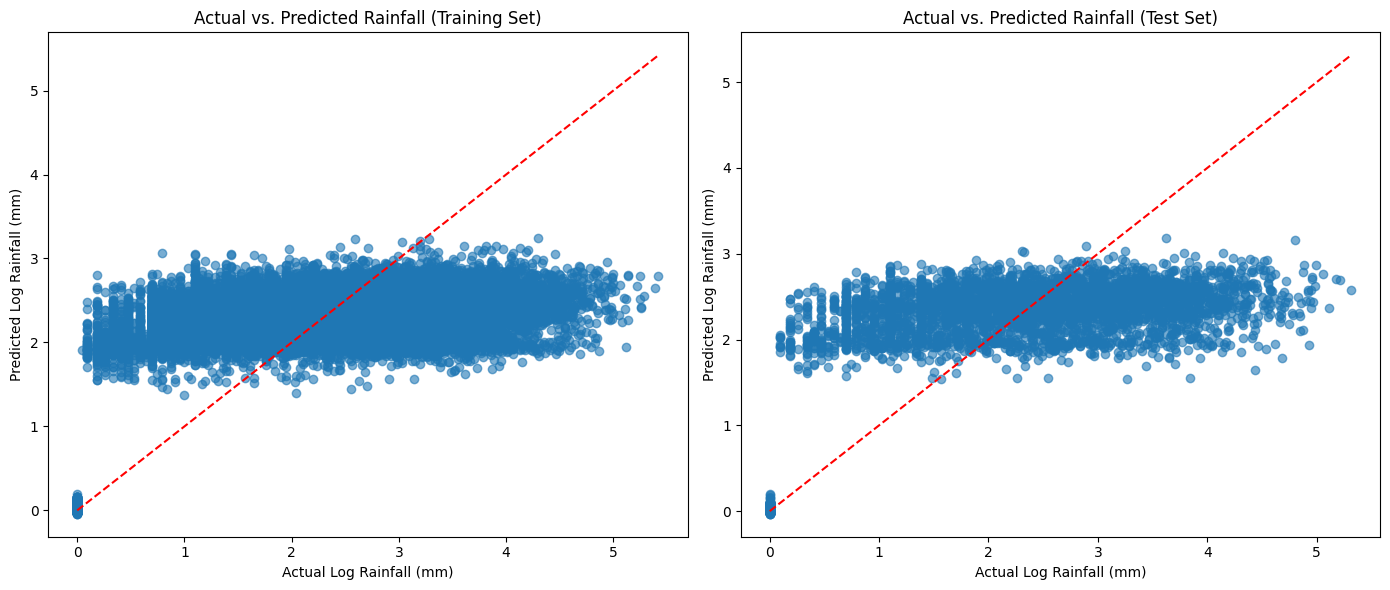

AttributeError: 'bool' object has no attribute 'astype'

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import timedelta

# Load your dataset
data = pd.read_csv('rainfall_raw.csv', encoding='ISO-8859-1')
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# DMS to Decimal conversion function
def dms_to_decimal(dms):
    match = re.match(r"(\d+)°(\d+)'(\d+)\"", dms)
    if match:
        degrees = float(match.group(1))
        minutes = float(match.group(2))
        seconds = float(match.group(3))
        decimal = degrees + minutes / 60 + seconds / 3600
        return decimal
    else:
        raise ValueError("Invalid DMS format")

# Convert latitude and longitude
data['Latitude'] = data['Latitude'].apply(dms_to_decimal)
data['Longitude'] = data['Longitude'].apply(dms_to_decimal)

# Create a rainy day indicator
data['rainy_day'] = (data['RF in mm'] > 0).astype(int)

# Log transformation (add a small constant to avoid log(0))
data['log_rainfall'] = np.log1p(data['RF in mm'])  # log(1 + rainfall)

# Create lag features for the past 7 days (using log_rainfall)
for lag in range(1, 8):
    data[f'lag_{lag}'] = data['log_rainfall'].shift(lag)

data.dropna(inplace=True)  # Drop rows with NaN values due to lag

# Feature Engineering
data['day_of_year'] = data['Date'].dt.dayofyear
data['month'] = data['Date'].dt.month
data['season'] = (data['month'] % 12 + 3) // 3  # 1: Spring, 2: Summer, 3: Fall, 4: Winter
features = data[['Latitude', 'Longitude', 'day_of_year', 'month', 'season', 'rainy_day'] + [f'lag_{lag}' for lag in range(1, 8)]].values
target = data['log_rainfall'].values  # Use log_rainfall as target

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reshape features for CNN: (samples, height, width, channels)
features_reshaped = features_scaled.reshape(features_scaled.shape[0], 1, features_scaled.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, target, test_size=0.2, random_state=42)

# Build the updated CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (1, 2), activation='relu', input_shape=(1, features_scaled.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Conv2D(32, (1, 2), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))  # Regularization
model.add(layers.Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)
print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')

# Plot Actual vs. Predicted for Training Set
plt.figure(figsize=(14, 6))

# Training Set Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Rainfall (Training Set)')
plt.xlabel('Actual Log Rainfall (mm)')
plt.ylabel('Predicted Log Rainfall (mm)')

# Test Set Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Rainfall (Test Set)')
plt.xlabel('Actual Log Rainfall (mm)')
plt.ylabel('Predicted Log Rainfall (mm)')

plt.tight_layout()
plt.show()

# Function to predict rainfall for the next years
def predict_future_rainfall(model, last_data, num_days=3650):  # Predicting for 10 years
    last_date = last_data['Date'].max()
    future_data = []

    # Initialize with the last known data
    last_row = last_data.iloc[-1]

    for i in range(num_days):
        day_of_year = (last_date + timedelta(days=i + 1)).dayofyear
        month = (last_date + timedelta(days=i + 1)).month
        season = (month % 12 + 3) // 3  # 1: Spring, 2: Summer, 3: Fall, 4: Winter

        future_row = {
            'Latitude': last_row['Latitude'],
            'Longitude': last_row['Longitude'],
            'day_of_year': day_of_year,
            'month': month,
            'season': season,
            'rainy_day': (day_of_year > 150).astype(int),  # Adjust based on historical patterns
        }

        # Update lag features dynamically
        for lag in range(1, 8):
            future_row[f'lag_{lag}'] = last_row['log_rainfall'] if len(future_data) >= lag else 0

        future_data.append(future_row)

        # Update last_row based on predicted rainfall
        future_row['log_rainfall'] = 0  # Placeholder for log rainfall
        last_row = future_row  # Update last_row for the next iteration

    future_df = pd.DataFrame(future_data)
    future_df['Date'] = [last_date + timedelta(days=i + 1) for i in range(num_days)]  # Add future dates
    future_df['log_rainfall'] = 0  # Placeholder for initial log rainfall

    # Prepare features for the model
    future_features = future_df[['Latitude', 'Longitude', 'day_of_year', 'month', 'season', 'rainy_day'] + [f'lag_{lag}' for lag in range(1, 8)]].values
    future_features_scaled = scaler.transform(future_features)
    future_features_reshaped = future_features_scaled.reshape(future_features_scaled.shape[0], 1, future_features_scaled.shape[1], 1)

    # Make predictions
    future_predictions = model.predict(future_features_reshaped)

    # Convert log predictions back to normal scale
    future_df['predicted_rainfall'] = np.expm1(future_predictions)

    return future_df[['Date', 'predicted_rainfall']]

# Predict rainfall for the next year
future_rainfall = predict_future_rainfall(model, data)

print(future_rainfall)

# Plot future predicted rainfall
plt.figure(figsize=(12, 6))
plt.plot(future_rainfall['Date'], future_rainfall['predicted_rainfall'], label='Predicted Rainfall', color='blue')
plt.title('Predicted Rainfall for Next 10 Years')
plt.xlabel('Date')
plt.ylabel('Predicted Rainfall (mm)')
plt.legend()
plt.show()

In [ ]:
# Function to predict rainfall for the next years
def predict_future_rainfall(model, last_data, num_days=365):  # Predicting for 10 years
    last_date = last_data['Date'].max()
    future_data = []

    # Initialize with the last known data
    last_row = last_data.iloc[-1]

    for i in range(num_days):
        day_of_year = (last_date + timedelta(days=i + 1)).dayofyear
        month = (last_date + timedelta(days=i + 1)).month
        season = (month % 12 + 3) // 3  # 1: Spring, 2: Summer, 3: Fall, 4: Winter

        future_row = {
            'Latitude': last_row['Latitude'],
            'Longitude': last_row['Longitude'],
            'day_of_year': day_of_year,
            'month': month,
            'season': season,
            'rainy_day': int(day_of_year > 150),  # Convert directly to int
        }

        # Update lag features dynamically
        for lag in range(1, 8):
            future_row[f'lag_{lag}'] = last_row['log_rainfall'] if len(future_data) >= lag else 0

        future_data.append(future_row)

        # Update last_row based on predicted rainfall
        future_row['log_rainfall'] = 0  # Placeholder for log rainfall
        last_row = future_row  # Update last_row for the next iteration

    future_df = pd.DataFrame(future_data)
    future_df['Date'] = [last_date + timedelta(days=i + 1) for i in range(num_days)]  # Add future dates

    # Prepare features for the model
    future_features = future_df[['Latitude', 'Longitude', 'day_of_year', 'month', 'season', 'rainy_day'] + [f'lag_{lag}' for lag in range(1, 8)]].values
    future_features_scaled = scaler.transform(future_features)
    future_features_reshaped = future_features_scaled.reshape(future_features_scaled.shape[0], 1, future_features_scaled.shape[1], 1)

    # Make predictions
    future_predictions = model.predict(future_features_reshaped)

    # Convert log predictions back to normal scale
    future_df['predicted_rainfall'] = np.expm1(future_predictions)

    return future_df[['Date', 'predicted_rainfall']]


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
          Date  predicted_rainfall
0   2023-01-01            0.025605
1   2023-01-02            0.025623
2   2023-01-03            0.025640
3   2023-01-04            0.025658
4   2023-01-05            0.025675
..         ...                 ...
360 2023-12-27            5.475784
361 2023-12-28            5.475818
362 2023-12-29            5.475854
363 2023-12-30            5.475920
364 2023-12-31            5.476118

[365 rows x 2 columns]


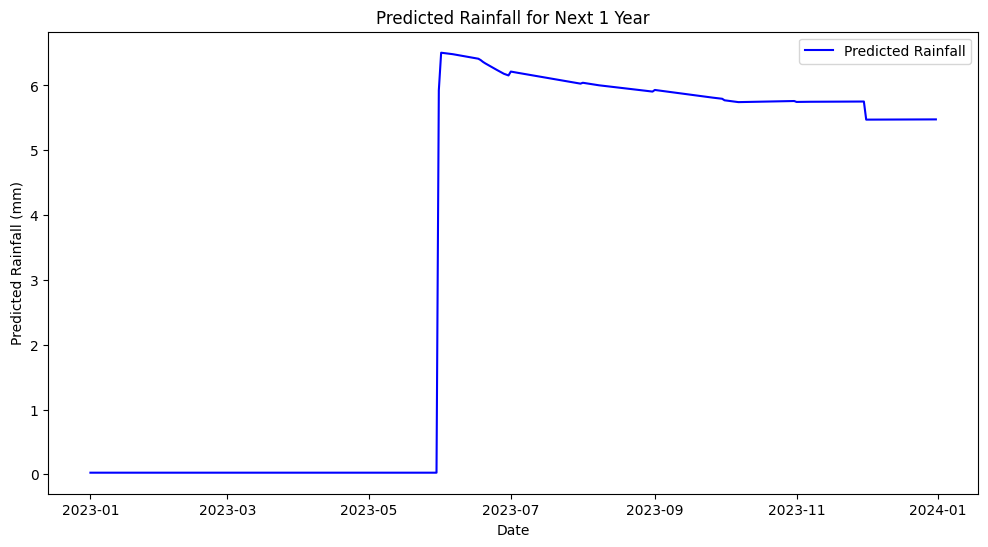

In [ ]:
# Predict rainfall for the next year
future_rainfall = predict_future_rainfall(model, data)

print(future_rainfall)

# Plot future predicted rainfall
plt.figure(figsize=(12, 6))
plt.plot(future_rainfall['Date'], future_rainfall['predicted_rainfall'], label='Predicted Rainfall', color='blue')
plt.title('Predicted Rainfall for Next 1 Year')
plt.xlabel('Date')
plt.ylabel('Predicted Rainfall (mm)')
plt.legend()
plt.show()